# Домашнее задание

- Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

1. Скачиваем текст произведения

In [1]:
# Проверяем, что файл читается
for i in range(1,5):
    print('Sample from tom number {}\n'.format(i))
    count = 0
    with open('tom_{}.txt'.format(i), encoding='utf-8') as f:
        for row in f:
            count += 1
            if 300 < count <= 303 and '\n' != row[0]:
                print(row)
        print('-'*50)

Sample from tom number 1

– Quelle delicieuse personne, que cette petite princesse! [Что за прелестная особа эта маленькая княгиня!] – сказал князь Василий тихо Анне Павловне.

Вскоре после маленькой княгини вошел массивный, толстый молодой человек с стриженою головой, в очках, светлых панталонах по тогдашней моде, с высоким жабо и в коричневом фраке. Этот толстый молодой человек был незаконный сын знаменитого Екатерининского вельможи, графа Безухого, умиравшего теперь в Москве. Он нигде не служил еще, только что приехал из-за границы, где он воспитывался, и был в первый раз в обществе. Анна Павловна приветствовала его поклоном, относящимся к людям самой низшей иерархии в ее салоне. Но, несмотря на это низшее по своему сорту приветствие, при виде вошедшего Пьера в лице Анны Павловны изобразилось беспокойство и страх, подобный тому, который выражается при виде чего-нибудь слишком огромного и несвойственного месту. Хотя, действительно, Пьер был несколько больше других мужчин в комнате, н

In [1]:
# импортируем библиотеки
import numpy as np
import re
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

2. Очистим его, оставив только русские буквы и символы пробела

In [3]:
# создадим новый файл, куда запишем все 4 тома
filename = 'all_toms.txt'

for i in range(1,5):
    with open('tom_{}.txt'.format(i), encoding='utf-8') as f:
        for row in f:
            
            row = re.sub('[^А-Яа-я ]', '', row).strip() # убираем все символы, кроме русских букв и пробелов
            row = re.sub(' +', ' ', row).lower() # избавляемся от задублированных пробелов и приводим все к нижнему регистру
            with open(filename, 'a') as file_object:
                file_object.write(row.strip() + "\n") # записываем в файл строки с символом новой строки на конце 
                
    print('-'*25 + 'DONE PART {}'.format(i) + '-'*25) # трекаем прогресс

-------------------------DONE PART 1-------------------------
-------------------------DONE PART 2-------------------------
-------------------------DONE PART 3-------------------------
-------------------------DONE PART 4-------------------------


3. Построим матрицу переходных вероятностей

In [4]:
# убедимся, что новый файл читается корректно
count = 0
with open('all_toms.txt', 'r') as f:
    for row in f:
        if count <=5:
            print(row)
            count += 1
# в файле остались символы новой строки, иначе это была бы одна большая строка, которую было бы затруднительно прочитать







лев толстой



война и мир



In [5]:
# определим алфавит
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
# создадим словарь с ключами буквами и значениями - номерами от 0
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}
POS_RU 

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31}

In [6]:
# создадим пока матрицу из нолей, куда запишем вероятности переходов
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
probabilities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
filename = 'all_toms_row.txt' # новый файл, в котором весь текст как одна строка (без символов новой строки)
count = 0   
with open('all_toms.txt') as f:
        for row in f:
            
            row = re.sub('\n', ' ', row) # меняем символ новой строки на пробел
            row = re.sub(' +', ' ', row) # избавляемся от задублированных пробелов
            count +=1
            if row[0] != ' ': # если строка начинается с пробела (пустая), то не копируем ее в новый файл
                with open(filename, 'a') as file_object:
                    file_object.write(row.strip() + " ")
            if count % 5000 == 0:
                print('{} rows done'.format(count))
            else:
                continue

5000 rows done
10000 rows done
15000 rows done
20000 rows done
25000 rows done


In [8]:
# открываем файл для чтения
with open(filename, 'r') as f:
    all_toms_row = f.read()

In [9]:
# бежим по символам (берем предыдущий и текущий)
for prev_simvol, curr_simvol in zip(all_toms_row[:-1], all_toms_row[1:]):
    try:
        probabilities[POS_RU[prev_simvol], POS_RU[curr_simvol]] += 1 # счетчик набегает по количеству встреченных переходов
    except:
        continue

In [291]:
for prev_simvol, curr_simvol in tqdm_notebook(zip(all_toms_row[:-1], all_toms_row[1:])):
    try:
        probabilities[POS_RU[prev_simvol], POS_RU[curr_simvol]] += 1 # счетчик набегает по количеству встреченных переходов
    except:
        continue


In [10]:
# имеем все тот же массим, но заполненный целыми числами
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 30])
print(probabilities.shape )

22.0
536.0
7.0
(32, 32)


In [11]:
probabilities.sum(axis=1)[:, np.newaxis]

array([[142874.],
       [ 39385.],
       [ 88914.],
       [ 43140.],
       [ 67500.],
       [143393.],
       [ 23965.],
       [ 35968.],
       [103836.],
       [  5044.],
       [ 64878.],
       [ 95412.],
       [ 48007.],
       [137486.],
       [206018.],
       [ 60460.],
       [ 98334.],
       [113779.],
       [122685.],
       [ 46017.],
       [  4193.],
       [ 10305.],
       [  7649.],
       [ 32758.],
       [ 21082.],
       [  6783.],
       [   985.],
       [ 32803.],
       [ 17893.],
       [  7015.],
       [  6116.],
       [ 21009.]])

In [12]:
# делим значения в столбцах матрицы на общее кол-во встреченных переходов от всех букв к рассмтариваемой
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [13]:
probabilities

array([[1.53981830e-04, 1.13806571e-02, 6.14457494e-02, ...,
        1.39983482e-05, 1.43553061e-02, 4.49766928e-02],
       [6.62434937e-02, 6.09369049e-04, 5.45893107e-03, ...,
        2.53903770e-05, 2.79294148e-04, 2.97575219e-02],
       [1.66329262e-01, 4.04885620e-04, 1.00096723e-03, ...,
        1.12468228e-05, 1.12468228e-05, 6.20824617e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.42551675e-04, ...,
        1.42551675e-04, 0.00000000e+00, 0.00000000e+00],
       [3.27011118e-04, 1.82635710e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.61870504e-02, 0.00000000e+00],
       [9.51972964e-05, 4.85506212e-03, 3.69841497e-02, ...,
        0.00000000e+00, 1.49935742e-02, 2.09910039e-02]])

In [14]:
# получили массим, в котором указаны вероятности (количество благоприятных исходов ко всем исходам)
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 30])
print(probabilities.shape )

0.000153981830144043
0.006028297006095778
0.001669449081803005
(32, 32)


In [15]:
# переводим все это в датафрейм
df = pd.DataFrame(probabilities, index=[c for c in RUSSIAN], columns=[c for c in RUSSIAN])

In [16]:
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.000154,0.011381,0.061446,0.015650,0.035717,0.017967,0.022068,0.074772,0.002198,0.012039,...,0.001267,0.013998,0.024196,0.004451,0.000000,0.000000,0.000000,0.000014,0.014355,0.044977
б,0.066243,0.000609,0.005459,0.000686,0.001498,0.144090,0.000482,0.000051,0.049435,0.000000,...,0.000203,0.001396,0.000305,0.013660,0.006881,0.276679,0.002539,0.000025,0.000279,0.029758
в,0.166329,0.000405,0.001001,0.001080,0.009290,0.133612,0.000022,0.014992,0.094496,0.000000,...,0.000371,0.001158,0.035934,0.000124,0.000405,0.076332,0.004949,0.000011,0.000011,0.006208
г,0.059017,0.000000,0.002434,0.000070,0.065415,0.032221,0.000070,0.000070,0.045086,0.000000,...,0.000093,0.001646,0.000440,0.000000,0.000000,0.000070,0.000116,0.000000,0.000209,0.000070
д,0.172563,0.001289,0.038681,0.000281,0.001081,0.178489,0.000563,0.000104,0.099941,0.000015,...,0.005941,0.001274,0.004904,0.000015,0.006844,0.024444,0.015941,0.000030,0.001719,0.016874


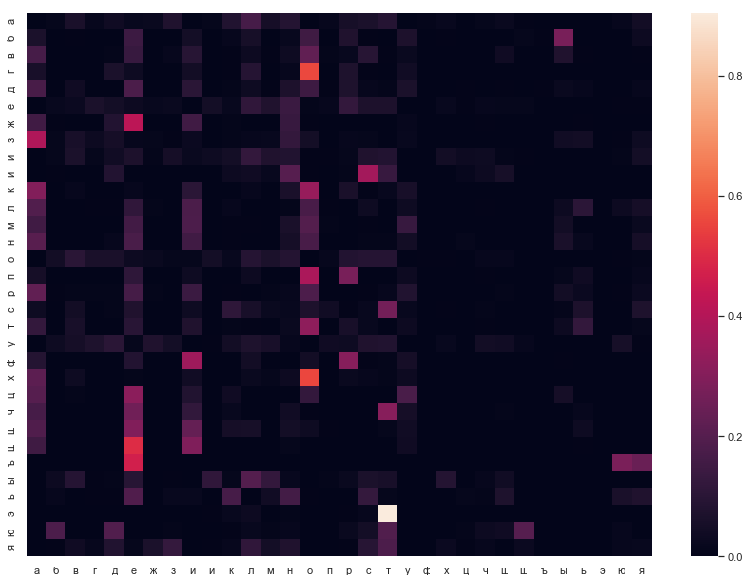

In [17]:
# строим тепловую карту. Высокое значение для последовательности "эт". Видимо это всякие слова "этот", "эти" и т.д.
plt.figure(figsize=(14,10))
sns.heatmap(df)
plt.show()

4. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [19]:
# Посчитаем вероятность начального состояния цепи для букв русского алфавита

In [25]:
# посчитаем число уникальных слов
len(set(all_toms_row.split(' ')))

49426

In [30]:
# грубо прикинем для каждой буквы вероятность того, что с нее начинается случайное слово
unique_words = list(set(all_toms_row.split(' ')))
unique_words[:10]

['',
 'натягивать',
 'разрушение',
 'разумеете',
 'темой',
 'пахать',
 'неизменную',
 'тонкости',
 'сорвавшись',
 'мелу']

In [35]:
# удалим первый элемент
del unique_words[0]

In [53]:
# посчитаем, сколько уникальных слов начинается на каждую букву
count_dict = {i:len(list(filter(lambda word: word[0] == i, unique_words))) for i in RUSSIAN}
count_dict

{'а': 598,
 'б': 2047,
 'в': 3914,
 'г': 1406,
 'д': 2119,
 'е': 207,
 'ж': 495,
 'з': 2361,
 'и': 1241,
 'й': 3,
 'к': 2300,
 'л': 965,
 'м': 1702,
 'н': 3224,
 'о': 3828,
 'п': 9033,
 'р': 2564,
 'с': 5167,
 'т': 1462,
 'у': 2121,
 'ф': 418,
 'х': 427,
 'ц': 197,
 'ч': 555,
 'ш': 588,
 'щ': 77,
 'ъ': 1,
 'ы': 2,
 'ь': 1,
 'э': 189,
 'ю': 46,
 'я': 167}

In [54]:
# видны аномалии: слова, начинающиеся с й, ы и т.д. Найдем их:
for anomal in 'йъыь':
    newlst = list(filter(lambda s: s[0] == anomal, unique_words))
    print(newlst)
# какие-то опечатки или может разорванные при переносе слова. Проигнорируем это, т.к. таких артефактов всего 7

['й', 'йна', 'йны']
['ъ']
['ыоказали', 'ы']
['ь']


In [66]:
# преобразуем значения в массив
prob_array =  np.array(list(count_dict.values()))
prob_array

array([ 598, 2047, 3914, 1406, 2119,  207,  495, 2361, 1241,    3, 2300,
        965, 1702, 3224, 3828, 9033, 2564, 5167, 1462, 2121,  418,  427,
        197,  555,  588,   77,    1,    2,    1,  189,   46,  167])

In [69]:
# чтобы посчитать вероятности
prob_array = prob_array / np.sum(prob_array)

In [70]:
prob_array

array([1.20991401e-02, 4.14162873e-02, 7.91906930e-02, 2.84471421e-02,
       4.28730400e-02, 4.18816388e-03, 1.00151745e-02, 4.77693475e-02,
       2.51087506e-02, 6.06980273e-05, 4.65351543e-02, 1.95245321e-02,
       3.44360142e-02, 6.52301467e-02, 7.74506829e-02, 1.82761760e-01,
       5.18765807e-02, 1.04542236e-01, 2.95801720e-02, 4.29135053e-02,
       8.45725847e-03, 8.63935255e-03, 3.98583713e-03, 1.12291351e-02,
       1.18968134e-02, 1.55791603e-03, 2.02326758e-05, 4.04653515e-05,
       2.02326758e-05, 3.82397572e-03, 9.30703085e-04, 3.37885685e-03])

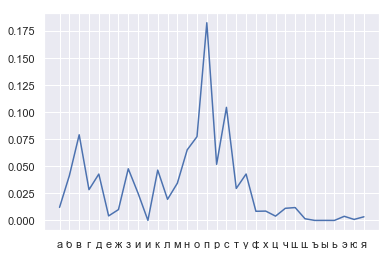

In [77]:
#Буква П - чемпион, с нее начинается больше всего слов (18% случаев)
x = [x for x in RUSSIAN]
y = prob_array
plt.plot(x,y)

In [112]:
# перезапишем значения словаря с абсолютных значений на относительные (вероятность)

In [87]:
for i,j in zip(list(prob_dict.keys()) , list(prob_array)):
    prob_dict[i] = j
prob_dict

{'а': 0.012099140111279716,
 'б': 0.041416287303995956,
 'в': 0.07919069296914517,
 'г': 0.028447142134547295,
 'д': 0.04287303995953465,
 'е': 0.004188163884673748,
 'ж': 0.010015174506828529,
 'з': 0.04776934749620637,
 'и': 0.025108750632271117,
 'й': 6.069802731411229e-05,
 'к': 0.04653515427415276,
 'л': 0.019524532119372787,
 'м': 0.03443601416287304,
 'н': 0.06523014668689935,
 'о': 0.07745068285280729,
 'п': 0.18276176024279212,
 'р': 0.05187658067779464,
 'с': 0.10454223571067274,
 'т': 0.029580171977744058,
 'у': 0.04291350531107739,
 'ф': 0.008457258472432979,
 'х': 0.008639352554375316,
 'ц': 0.0039858371269600405,
 'ч': 0.011229135053110774,
 'ш': 0.011896813353566009,
 'щ': 0.0015579160343955488,
 'ъ': 2.0232675771370762e-05,
 'ы': 4.0465351542741524e-05,
 'ь': 2.0232675771370762e-05,
 'э': 0.0038239757207890746,
 'ю': 0.0009307030854830552,
 'я': 0.0033788568538189174}

In [90]:
# Вероятность начального состояния цепи для буквы "п" составляет 
prob_dict['п']

0.18276176024279212

In [110]:
# Найдем уже вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р
start = 'п' #первая буква
end = 'р' #вторая буква
start_proba = prob_dict[start] #вероятность того, что слово начинается с буквы "п"
proba = 0 #искомая вероятность, пока равняется нулю

for letter_vert in RUSSIAN: #для каждой буквы алфавита
    for letter_hor in RUSSIAN: # итерируем тоже каждую букву алфавита
        # перемножаем вероятности (считаем, что событие переход од n-ной буквы к n+1 букве - это независимое событие)
        proba += start_proba *\
            probabilities[POS_RU[start], POS_RU[letter_vert]] *\
            probabilities[POS_RU[letter_vert], POS_RU[letter_hor]] *\
            probabilities[POS_RU[letter_hor], POS_RU[end]]

In [111]:
proba

0.007286308654753215

5. Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [207]:
import random

x = 8 # задаем длину слова
start = 'б' # задаем первую букву слова

word = start
while x > 1: # пока счетчик не закончится генерим следующую букву на основе верояиностей из probabilities
    # в параметр weights передаем список вероятностей для всех букв
    letter = random.choices([w for w in RUSSIAN], weights=list(probabilities[POS_RU[start], :]))[0]
    word += letter # добавляем получившуюся букву к слова
    start = letter # следующий цикл начинаем с получившейся буквы
    #print(word)
    x -= 1
print(word)

бытоналд


In [208]:
# это очень забавно. Захотелось сгенерить десяток таких слов. Можно сделать шутеечное приложение для писателей для генерации
# имен персонажей в стиле, например, книжек Толкиена и т.д.

new_vocabulary = []
for i in range(10):
    x = 8 # задаем длину слова
    start = 'б' # задаем первую букву слова

    word = start
    while x > 1: # пока счетчик не закончится генерим следующую букву на основе верояиностей из probabilities
    # в параметр weights передаем список вероятностей для всех букв
        letter = random.choices([w for w in RUSSIAN], weights=list(probabilities[POS_RU[start], :]))[0]
        word += letter # добавляем получившуюся букву к слова
        start = letter # следующий цикл начинаем с получившейся буквы
        #print(word)
        x -= 1
    new_vocabulary.append(word)
new_vocabulary

['бускомет',
 'беенажец',
 'борогово',
 'бымиличе',
 'белющепо',
 'бакомиму',
 'богомико',
 'бволижег',
 'буюбубим',
 'быловсла']

6. Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [83]:
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

In [84]:
df = pd.read_csv('numbers-on-unemployment-benefits1.csv')
df.columns = ['Month', 'Numbers']
df.dropna(inplace=True)

In [85]:
series = df['Numbers'].values[:, np.newaxis]

In [86]:
# посчитаем score для разных количеств состояний
elbow = []
for n in range(1, 21):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(series)
    print (n, model.score(series))
    elbow.append(model.score(series))

1 -6052.087693811389
2 -5328.153028537578
3 -5192.687019289387
4 -5130.695412154089
5 -5070.071719670107
6 -4940.746091508953
7 -4914.212212091035
8 -4876.090717576338
9 -4850.611135801662
10 -4831.930400686669
11 -4778.549219200038
12 -4761.895883645519
13 -4746.516794600678
14 -4747.93633052679
15 -4718.121559319837
16 -4717.70359227037
17 -4673.93626997342
18 -4645.5709058893335
19 -4649.131097751185
20 -4621.727808396676


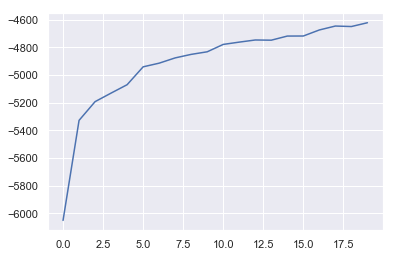

In [87]:
# трудно выбрать на глаз количество компонент
plt.plot(elbow)

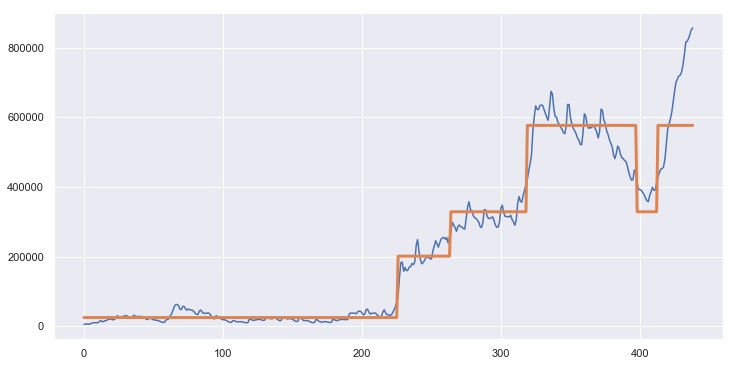

In [88]:
# на глаз - как-будто бы есть 4 уровня графика. Пусть n_components будет равно 4
# чем больше n_components, тем 
model = GaussianHMM(n_components=4,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(series)
labels = model.predict(series) # не прогнозирует, а восстанавливает метки скрытых состояний
means = np.zeros_like(series)
for i in range(model.n_components):
    means[labels == i] = model.means_[i] # получаем значения средней для каждого уровн (компоненты)
    
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.plot(means, linewidth=3)

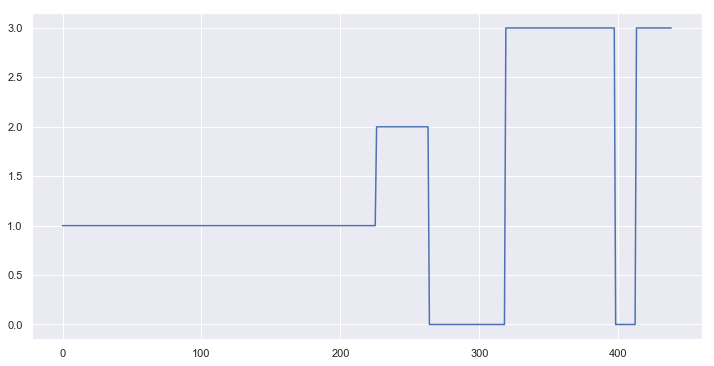

In [89]:
plt.figure(figsize=(12,6))
plt.plot(labels[:])
plt.show()

In [90]:
# спрогнозируем 20 последних значений
cur_value = labels[-1]
predictions = []
for _ in range(20):
    cur_value = np.random.choice(4, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [91]:
model.transmat_[cur_value]

array([9.52102339e-003, 1.41904408e-157, 4.09901407e-043, 9.90478977e-001])

In [92]:
# посмотрим на предсказания
predictions

[array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585]),
 array([576613.19803585])]

In [93]:
# из списка массивов переведем в массив
predictions = list(map(lambda x: [x[0]], list(predictions)))

In [94]:
# соединим прогноз и исходный ряд
new_ser = np.concatenate((series, np.array(predictions)))

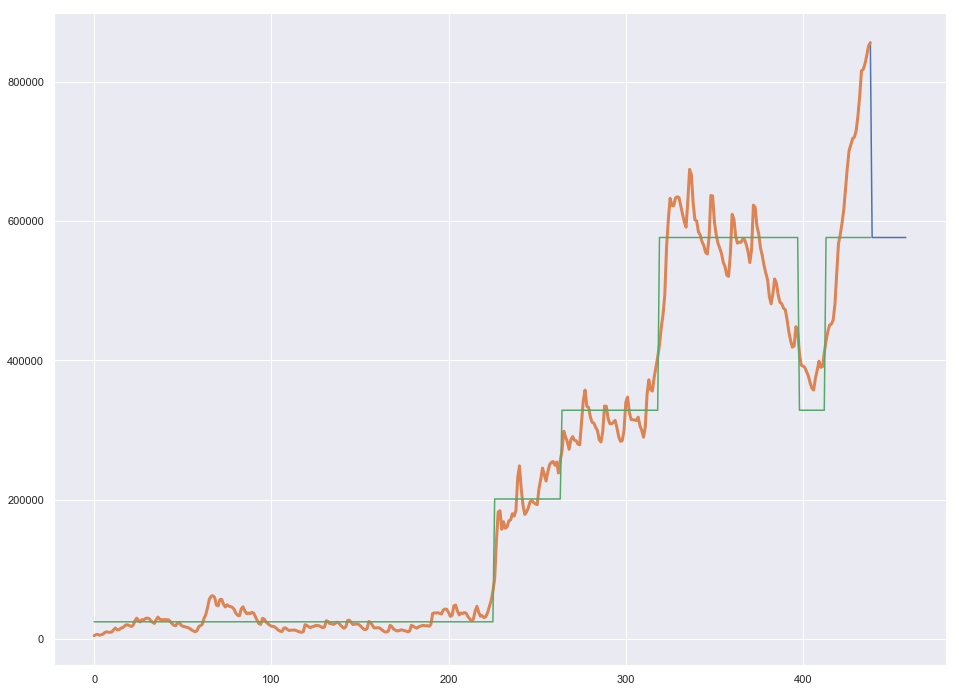

In [102]:
# рисуем
plt.figure(figsize=(16,12))
plt.plot(new_ser)
plt.plot(series, linewidth=3)
plt.plot(means)
plt.show()